# Using the Arrhenius plot to determine kinematic constants

The purpose of this notebook is to illustrate the use of an Arrhenius plot to determine the kinetic constants and activation energy of a thermal activated process. You have probably used it before if you have done A-level Chemistry. The method is named after a physicist called [Svante Arrhenius](https://en.wikipedia.org/wiki/Svante_Arrhenius)

![Svante Arrhenius](https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Svante_Arrhenius_01.jpg/381px-Svante_Arrhenius_01.jpg)

This notebook follows the [Wikipedia entry](https://en.wikipedia.org/wiki/Arrhenius_plot), which is mostly correct and you can consult for more background.

The example we are going to use is that of nitrogen dioxide decay:

$$ 2\,\text{NO}_{2} \longrightarrow 2\, \text{NO} + \, \text{O}_2$$

The rates of reaction increase with temperature in a non-linear way. Experimentally determined rates at different temperatures are given in the following table:


| Temperature ($\mathrm{K}$)        | Rate of reaction ($10^{-4} \mathrm{cm}^3 \mathrm{mol}^{-1} \mathrm{s}^{-1} $)  |
| :-------------:|:-------------:|
|592|5 |
|604|8 |
|627|17|
|654|40|
|656|50|

If we plot these values, we can see that the rate of reaction increases with temperature:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
temperatures_list=[592.0,604.0,627.0,654.0,656.0]
rates_list=[5.0,8.1,17.2,40.4,50.5]

(0.0, 55.0)

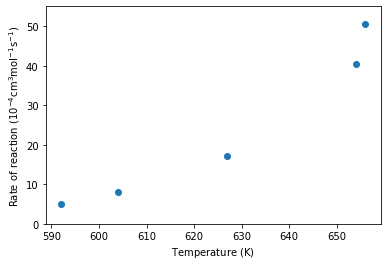

In [3]:
plt.plot(temperatures_list,rates_list,'o')
plt.xlabel('Temperature ($\mathrm{K}$)')
plt.ylabel('Rate of reaction ($10^{-4} \mathrm{cm}^3 \mathrm{mol}^{-1} \mathrm{s}^{-1} $)')
plt.ylim([0,55])

To analyse this data, the change in rate with temperature is often modelled using the Arrhenius equation:

$$k=\mathrm{A} e^{-\frac{\mathrm{Q}}{\mathrm{R}T}}$$

where $k$ is the rate constant, $\mathrm{A}$ is a constant, Q is the activation energy, $T$ is the temperature and $\mathrm{R} = 8.314 \mathrm{\,J\,K^{-1}\,mol^{-1}}$ is the universal gas constant. 

We are primarily interested in determining $\mathrm{Q}$ and $\mathrm{A}$, which which we can then use to predict the rate of reaction at any temperature.

To determine these parameters, we are going to use an Arrhenius plot. To obtain this plot, we first need to linearise the Arrhenius equation by applying $\ln$ to each side:

$$\ln(k)=\ln(\mathrm{A}) -\frac{\mathrm{Q}}{\mathrm{R}T}$$

This can also be written as:

$$\ln(k)=\ln(\mathrm{A}) -\frac{\mathrm{Q}}{\mathrm{R}}\,\frac{1}{T}$$

which is the equation of a line:

$$y=c+ m\,x$$

where $y=\ln(k)$, $m=-\frac{\mathrm{Q}}{\mathrm{R}}$ and $x=\frac{1}{T}$.

since we usually have several experimental points, we would to use them all to determine one set of values. In the Arrhenius plot method, we plot $y=\ln(k)$ against $x=\frac{1}{T}$ and then fit a straight line to the data, the slope of which can be used to determine the activation energy from $m=-\frac{\mathrm{Q}}{\mathrm{R}}$. 

**Important:** Note that temperature is in K. If temperature is given in other units, it must first be converted into K before being used in the Arrhenius plot.


In [4]:
k=np.array(rates_list)
T=np.array(temperatures_list)
ln_k=np.log(k)
inv_T=1/T

Text(0, 0.5, 'ln (k ($10^{-4} \\mathrm{cm}^3 \\mathrm{mol}^{-1} \\mathrm{s}^{-1} $))')

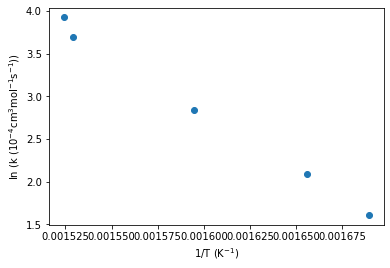

In [5]:
plt.plot(inv_T,ln_k,'o')
plt.xlabel('1/T ($\mathrm{K^{-1}}$)')
plt.ylabel('ln (k ($10^{-4} \mathrm{cm}^3 \mathrm{mol}^{-1} \mathrm{s}^{-1} $))')

Although the plot is not a perfect straight line, the relationship is clearly linear. Next we need to fit a straight line to the plot. We will use the `curve_fit` function but there are a couple of other functions available to fit a straight line. 

In [6]:
from scipy.optimize import curve_fit

Define the function for the line:

In [7]:
def line(x,m,c):
    y=m*x+c
    return y

Fit the data:

In [8]:
fit_params=curve_fit(line,inv_T,ln_k)

Get the fit parameters from the returned arrays:

In [9]:
m=fit_params[0][0]
c=fit_params[0][1]

Create rate values use fit parameters to check the fit:

In [10]:
ln_k_fit=line(inv_T,m,c)

Text(0, 0.5, 'log (k ($10^{-4} \\mathrm{cm}^3 \\mathrm{mol}^{-1} \\mathrm{s}^{-1} $))')

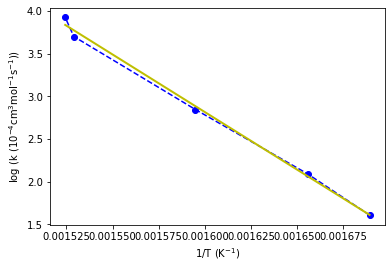

In [11]:
plt.plot(inv_T,ln_k,'bo--')
plt.plot(inv_T,ln_k_fit,'y',lw=2)
plt.xlabel('1/T ($\mathrm{K^{-1}}$)')
plt.ylabel('log (k ($10^{-4} \mathrm{cm}^3 \mathrm{mol}^{-1} \mathrm{s}^{-1} $))')

The fit is a good one so we can go ahead and calculate Q and A.

In [12]:
Q=-8.314*m
A=np.exp(c)

print('Q = {:2.2f} x 10^3 J mol^-1'.format(Q/(10**3)))
print('A = {:2.2f} x 10^10'.format(A/(10**10)))

Q = 112.11 x 10^3 J mol^-1
A = 3.91 x 10^10


Thus our rate equation for this reaction is:
    
$$k=3.91\times10^{10} e^{-\dfrac{112.11\times10^{3}}{\mathrm{R}T}}$$

This can now be used to predict the rate at any temperature.

We can compile these steps into one function, which together with the line function above can be reused in another notebook:

In [13]:
def arrhenius(k_vals,T_vals):
    ''' Arrhenius method for kinematic constants
    inputs:
    k_vals -- rates of reaction in 10^−4 cm^3 mol^−1 s^−1
    T_vals -- temperature in K
    returns:
    A -- pre-exponential factor
    Q -- Activation energy in J mol^-1
    '''
    k=np.array(k_vals)
    T=np.array(T_vals)
    ln_k=np.log(k)
    inv_T=1/T
    fit_params=curve_fit(line,inv_T,ln_k)
    m=fit_params[0][0]
    c=fit_params[0][1]
    Q=-8.314*m
    A=np.exp(c)
    print('Q = {:2.2f} x 10^3 J mol^-1'.format(Q/(10**3)))
    print('A = {:2.2f} x 10^10'.format(A/(10**10)))
    return A,Q

Testing the function:

In [14]:
A_f,Q_f=arrhenius(rates_list,temperatures_list)

Q = 112.11 x 10^3 J mol^-1
A = 3.91 x 10^10


Finally, we will just check if the new equation fits the original data well:

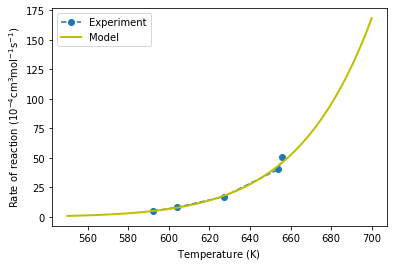

In [15]:
T=np.linspace(550,700)
k_fit=A_f*np.exp(-Q_f/(8.314*T)) #using the output of thr arrhenius function
plt.plot(temperatures_list,rates_list,'o--')
plt.plot(T,k_fit,'y',lw=2)
plt.xlabel('Temperature ($\mathrm{K}$)')
plt.ylabel('Rate of reaction ($10^{-4} \mathrm{cm}^3 \mathrm{mol}^{-1} \mathrm{s}^{-1} $)')
plt.legend(('Experiment','Model'),loc=0)

Pretty good.